In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl
import seaborn as sns
import time

## loading model with dummy variables and $m^{2}$ as value to predict

In [2]:
infile = open('..//real_estate_data_frame_sqr_dummy','rb')
frame = pkl.load(infile)
infile.close()

In [3]:
X = frame.iloc[:, 1:].values

In [4]:
y = frame.iloc[:, 0].values

## train test split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

## random forest regressor and grid search

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [8]:
parameters = [{'n_estimators':[50,100,200,300,400,500]}]

In [9]:
grid_search = GridSearchCV(estimator = RandomForestRegressor(),
                           param_grid = parameters,
                           cv = 10,
                           n_jobs = -1)

In [12]:
start = time.time()

grid_search = grid_search.fit(X_train, y_train)

stop = time.time()
print('\n',(stop-start)//60,'min.')


 197.0 min.


In [15]:
grid_search.best_score_

0.45755166419737137

In [16]:
grid_search.best_params_

{'n_estimators': 200}

In [18]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,349.040461,18.938045,0.088519,0.011678,50,{'n_estimators': 50},0.486875,0.392181,0.486720,0.437280,0.534692,0.454456,0.426297,0.410260,0.372177,0.491971,0.449291,0.048332,5
1,559.833849,58.544377,0.151542,0.035065,100,{'n_estimators': 100},0.484607,0.376853,0.483030,0.447767,0.537485,0.451330,0.416644,0.421038,0.379828,0.491458,0.449004,0.048871,6
2,1330.955970,107.404617,0.321766,0.039692,200,{'n_estimators': 200},0.482261,0.397714,0.491493,0.453523,0.537546,0.460330,0.435200,0.437045,0.377658,0.502747,0.457552,0.045948,1
3,1765.397736,63.647513,0.444092,0.045071,300,{'n_estimators': 300},0.484408,0.386079,0.482865,0.450004,0.538785,0.457828,0.427848,0.435244,0.380176,0.498558,0.454179,0.046969,3
4,2244.430002,115.866474,0.596403,0.079162,400,{'n_estimators': 400},0.483783,0.378773,0.489899,0.451774,0.540638,0.455552,0.423992,0.437970,0.378991,0.498992,0.454036,0.049149,4
5,2503.353891,390.862292,0.544058,0.200654,500,{'n_estimators': 500},0.485248,0.379490,0.487673,0.450621,0.536913,0.452012,0.438496,0.439580,0.379735,0.497707,0.454748,0.047350,2


In [8]:
start = time.time()

model = RandomForestRegressor(n_estimators = 200, random_state = 0)
model.fit(X_train, y_train)

stop = time.time()
print('\n',(stop-start)//60,'min.')


 6.0 min.


## model evaluation

In [9]:
from sklearn.metrics import r2_score

In [10]:
predictions = model.predict(X_test)

In [11]:
r2_score(y_test,predictions)

0.5604856612796938

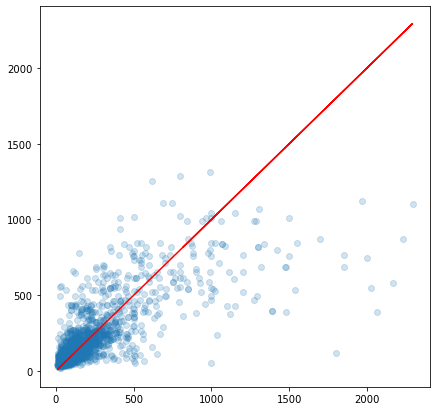

In [12]:
plt.figure(figsize=(7,7))
# plt.xlim(700,2500)
# plt.ylim(0,500)

# predictions
plt.scatter(y_test,predictions,edgecolor=None,alpha=0.2)

# perfect predictions
plt.plot(y_test,y_test,'r')

In [13]:
predictions

array([148.65143456,  58.10095606, 281.12370439, ...,  67.88813803,
       407.16009048, 616.98774076])

In [14]:
predictions[:20]/y_test[:20]

array([1.36530625, 2.19492501, 1.12449482, 1.27659113, 0.84299564,
       0.79442416, 1.45923351, 1.07183759, 1.33844164, 1.30296106,
       2.30728223, 2.68621161, 0.29801313, 0.46119159, 1.59792165,
       1.96305951, 0.70676734, 0.6822593 , 0.88809572, 1.93134364])